In [1]:
import numpy as np

def EulerSieve1(N):
    L = np.arange(2,N+1)
    P = 2
    while P**2 < N:
        indexP = np.where(L == P)[0][0]
        indexNP = np.where(L == N//P)[0][0]
        L1 = L[indexP:indexNP+1]
        L2 = np.multiply(P,L1)
        L = [x for x in L if x not in L2]
        if len(L) > indexP+1:
            P = L[indexP+1]
    return L

print(EulerSieve1(27))

[2, 3, 5, 7, 11, 13, 17, 19, 23]


In [8]:
import numpy as np

def EulerSieve2(N):
    L = np.ones(N,dtype=int) #np.full(N, True) #np.ones(N,dtype=int)
    L[0] = 0 #False
    P = 2
    indexP = P-1
    while P**2 < N:
        L1 = np.zeros(N,dtype=int)
        #L1 = np.full(N, False)
        for i in range(indexP, N//P):
            if L[i] == 1: #True:
                L1[i] = 1 #True
        L2 = np.zeros(N,dtype=int)
        #L2 = np.full(N, False)
        for index,element in enumerate(L1):
            if element == 1: #True:
                L2[((index+1)*P)-1] = 1 #True
        for i in range(N):
            if L2[i] == 1: #True:
                L[i] = 0 #False
        P += 1
        while L[P-1] == 0: #False:
            P += 1
        indexP = P-1
    return L
    
print(EulerSieve2(27))

L1 [0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
L2 [0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]
L [0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
P 3
L1 [0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
L2 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1]
L [0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0]
P 5
L1 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
L2 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
L [0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0]
P 7
[0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0]


In [52]:
import numpy as np

def ConnectMidpoints(P):
    Px,Py = P
    Qx = np.array
    Qy = np.array
    length = np.size(Px)
    for i in range(length-1):
        Qx = np.append(Qx, (Px[i] + Px[i+1]) // 2)
        Qy = np.append(Qy, (Py[i] + Py[i+1]) // 2)
    Qx = np.append(Qx, (Px[0] + Px[-1]) // 2)
    Qy = np.append(Qy, (Py[0] + Py[-1]) // 2)
    return Qx, Qy

Qx, Qy = ConnectMidpoints(([0,2,4,-2,6],[0,8,0,6,6]))
print('Qx', Qx) #[1,3,1,2,3]
print('Qy', Qy) #[4,4,3,6,3]

Qx [<built-in function array> 1 3 1 2 3]
Qy [<built-in function array> 4 4 3 6 3]


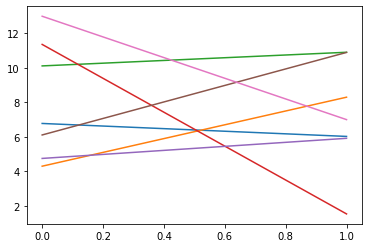

IndexError: index 1 is out of bounds for axis 0 with size 1

In [54]:
import numpy as np
import matplotlib.pyplot as plt

def ConvergingPolygons(P, N):
    Ps = np.array([P])
    #Ps[0] = P
    plt.plot(P)
    plt.show()
    Ps[1] = ConnectMidpoints(P)
    for poly in range(1,N):
        #if poly%2 == 0:
        Ps[poly+1] = ConnectMidpoints(Ps[poly])
        plt.plot(Ps[poly]) #,(Ps[poly][0][0],Ps[poly][1][0]))
        #if poly%2:
            #plt.plot(Ps[poly+1])
        plt.show()
        
#Px = np.array(7+np.multiply([1.,3.,5.,7.,2.5,4.,6.],np.cos(10*np.pi*1/7)))
#Py = np.array(7+np.multiply([1,3,5,7,2.5,4,6],np.sin(10*np.pi*1/7)))
#Px = 7+[1.,3.,5.,7.,2.5,4.,6.]*np.cos(10*np.pi*1/7)
#Py = 7+[1,3,5,7,2.5,4,6]*np.sin(10*np.pi*1/7)
#Px = 7+np.dot([1,3,5,7,2.5,4,6],np.cos(10.*np.multiply(np.pi,np.multiply([1,2,3,4,5,6,7],1/7))))
#Py = 7+np.dot([1,3,5,7,2.5,4,6],np.sin(10.*np.multiply(np.pi,np.multiply([1,2,3,4,5,6,7],1/7))))
Px = 7+np.multiply([1,3,5,7,2.5,4,6],np.cos(10.*np.multiply(np.pi,[1./7.,2./7.,3./7.,4./7.,5./7.,6./7.,7./7.])))
Py = 7+np.multiply([1,3,5,7,2.5,4,6],np.sin(10.*np.multiply(np.pi,[1./7.,2./7.,3./7.,4./7.,5./7.,6./7.,7./7.])))
ConvergingPolygons((Px,Py),6)

[[ 6.77747907  4.2970934  10.11744901 11.36442861  4.74757783  6.10991626
  13.        ]
 [ 6.02507209  8.30165122 10.90915741  1.52717962  5.91529065 10.89971165
   7.        ]]


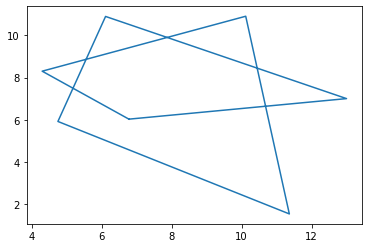

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 2, the array at index 0 has size 7 and the array at index 1 has size 8

In [61]:
def ConvergingPolygons(P, N):
    Ps = np.array([P])
    #Ps[0] = [P[0], P[1]]
    print(Ps[0])
    plt.plot(np.append(Ps[0][0],Ps[0][0][0]),np.append(Ps[0][1],Ps[0][1][0]))
    plt.show()
    #Ps[1] = [ConnectMidpoints(P)]
    Ps = np.append(Ps, [ConnectMidpoints(P)], axis=1)
    print(Ps)
    for poly in range(1,N):
        #if poly%2 == 0:
        #Ps[poly+1][0], Ps[poly+1][1] = ConnectMidpoints(Ps[poly])
        Ps = np.append(Ps, [ConnectMidpoints(Ps[poly])], axis=1)
        print(np.append(Ps[poly][0],Ps[poly][0][0]))
        print(np.append(Ps[poly][1],Ps[poly][1][0]))
        plt.plot(np.append(Ps[poly][0],Ps[poly][0][0]), np.append(Ps[poly][1],Ps[poly][1][0])) #,(Ps[poly][0][0],Ps[poly][1][0]))
        #if poly%2:
            #plt.plot(Ps[poly+1])
        plt.show()
        
#Px = np.array(7+np.multiply([1.,3.,5.,7.,2.5,4.,6.],np.cos(10*np.pi*1/7)))
#Py = np.array(7+np.multiply([1,3,5,7,2.5,4,6],np.sin(10*np.pi*1/7)))
#Px = 7+[1.,3.,5.,7.,2.5,4.,6.]*np.cos(10*np.pi*1/7)
#Py = 7+[1,3,5,7,2.5,4,6]*np.sin(10*np.pi*1/7)
cs = np.array
ss = np.array
Px = 7+np.multiply([1,3,5,7,2.5,4,6],np.cos(10.*np.multiply(np.pi,[1./7.,2./7.,3./7.,4./7.,5./7.,6./7.,7./7.])))
Py = 7+np.multiply([1,3,5,7,2.5,4,6],np.sin(10.*np.multiply(np.pi,[1./7.,2./7.,3./7.,4./7.,5./7.,6./7.,7./7.])))
ConvergingPolygons((Px,Py),6)